/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Conjuntos frecuentes encontrados:
    support           itemsets
0  0.525189             (SEXO)
1  0.071115        (EST_CIVIL)
2  0.100758            (HIJOS)
3  0.648677  (TRABAJA_ESTUDIA)
4  0.338828        (VIVE_SOLO)
Reglas de asociación generadas:
          antecedents         consequents  antecedent support  \
0             (HIJOS)              (SEXO)            0.100758   
1              (SEXO)   (TRABAJA_ESTUDIA)            0.525189   
2         (VIVE_SOLO)              (SEXO)            0.338828   
3  (NIVEL_SOCIO_ECON)              (SEXO)            0.669547   
4              (SEXO)  (NIVEL_SOCIO_ECON)            0.525189   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.525189  0.055563    0.551451  1.050004  0.002646    1.058548   
1            0.648677  0.324073    0.617059  0.951257 -0.016606    0.917433   
2            0.525189  0.172405    0.508827  0.968845 -0.005544    0.966687   
3            0.525189  0.351588    0.5251

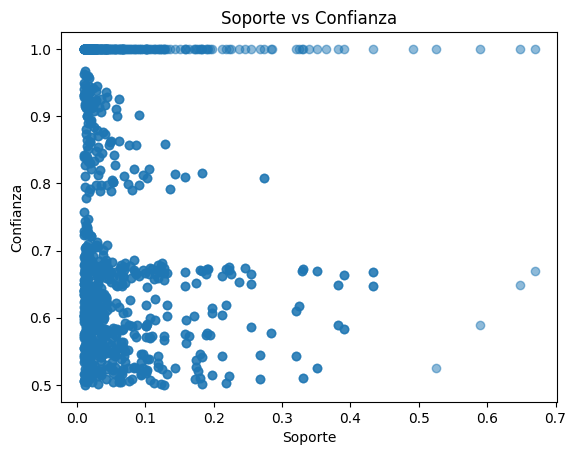

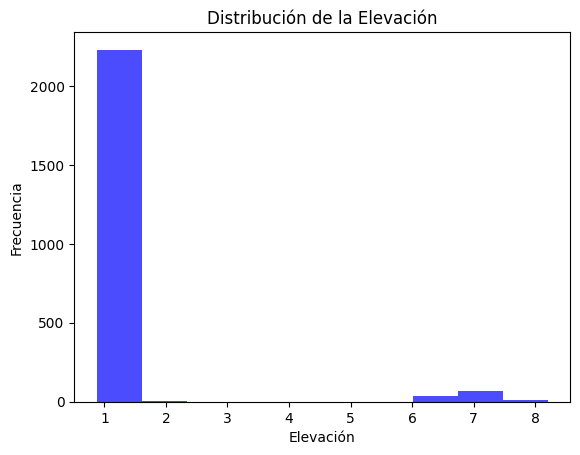

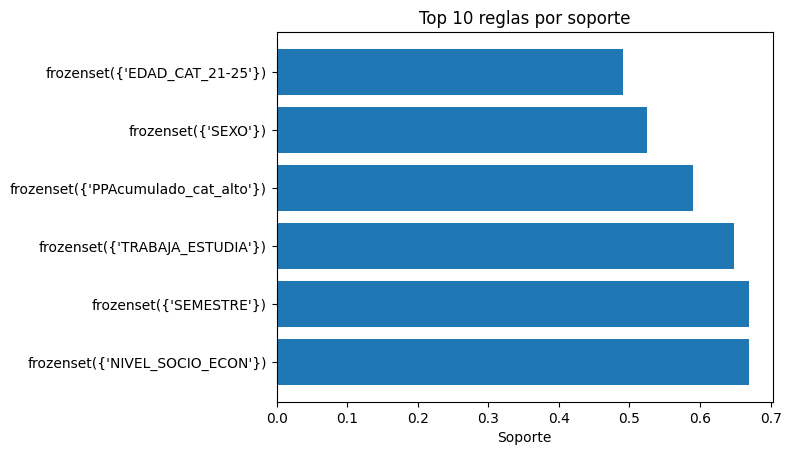

In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

# Paso 1: Cargar el dataset
data = pd.read_csv('uac_limpio.csv')

# Paso 2: Eliminar la columna 'ESCUELA'
data = data.drop(columns=['ESCUELA'])

# Paso 3: Preprocesamiento de datos
# Convertir PPAcumulado en categorías discretas (por ejemplo, bajo, medio, alto)
data['PPAcumulado_cat'] = pd.cut(data['PPACumulado'], bins=[0, 12, 15, 20],
                                 labels=['bajo', 'medio', 'alto'])

# Convertir otras variables categóricas en variables binarias
# Variables binarizadas usando get_dummies
# Agrupar la edad en rangos
data['EDAD_CAT'] = pd.cut(data['EDAD'], bins=[15, 20, 25, 30, 35, 40, 100],
                          labels=['15-20', '21-25', '26-30', '31-35', '36-40', '40+'])

# Luego aplicar One-Hot Encoding a estos rangos
data_dummy = pd.get_dummies(data[['EDAD_CAT', 'SEXO', 'EST_CIVIL', 'HIJOS',
                                  'TRABAJA_ESTUDIA', 'VIVE_SOLO', 'NIVEL_SOCIO_ECON',
                                  'SEMESTRE', 'PPAcumulado_cat']])

# Asegurarse de que las columnas sean binarias (0 y 1) o booleanas
data_dummy = data_dummy.astype(bool)

# Paso 4: Aplicar el algoritmo Apriori
frequent_itemsets = apriori(data_dummy, min_support=0.01, use_colnames=True)

# Mostrar los conjuntos frecuentes
print("Conjuntos frecuentes encontrados:")
print(frequent_itemsets.head())

# Paso 5: Generar reglas de asociación a partir de los conjuntos frecuentes
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Mostrar las reglas
print("Reglas de asociación generadas:")
print(rules.head())

# Paso 6: Visualización de los resultados

# Graficar el soporte vs confianza
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.title('Soporte vs Confianza')
plt.xlabel('Soporte')
plt.ylabel('Confianza')
plt.show()

# Graficar la elevación de las reglas
plt.hist(rules['lift'], bins=10, alpha=0.7, color='b')
plt.title('Distribución de la Elevación')
plt.xlabel('Elevación')
plt.ylabel('Frecuencia')
plt.show()

# Graficar las 10 reglas con mayor soporte
top_10_rules = rules.nlargest(10, 'support')
plt.barh(top_10_rules['antecedents'].astype(str), top_10_rules['support'])
plt.title('Top 10 reglas por soporte')
plt.xlabel('Soporte')
plt.show()